# Chapter 1 - Train one Neuron

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Set the random seed to 2 so you always see similar results:

In [2]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

### Your Task

The briefing meeting is complete! Here are the notes you took for your first task.

- After quality check → ingredients are sent out on the same line (for washing)
- All items sorted by ingredient for packing + shipping to diff. franchises.
- Problem = corn and olives often get confused on sorting line.
  * Corn sneaks into the olive container, and vice versa
  * Correcting for this = time waste. 
- Already have camera info. about shape + color.

Action plan: Need to detect between corn and olives. Build model to detect each type of ingredient. 

So, it looks like your challenge is to build a corn vs. olives detector.

### Understand the data

In [3]:
corn_and_olives_dataset = pd.DataFrame.from_dict({
        'shape': ['round', 'oval'],
        'color': ['yellow', 'green'],
        'ingredient_type': ['corn', 'olives']
    }
)

In [4]:
corn_and_olives_dataset

,shape,color,ingredient_type
0,round,yellow,corn
1,oval,green,olives


Convert the data from strings of 'yes' and 'no' to numbers - something the machine can understand:

In [5]:
corn_and_olives_dataset['c_shape'] = corn_and_olives_dataset['shape'].apply(lambda x: 1 if x == 'round' else 0)
corn_and_olives_dataset['c_color'] = corn_and_olives_dataset['color'].apply(lambda x: 1 if x == 'yellow' else 0)
corn_and_olives_dataset['c_ingredient_type'] = corn_and_olives_dataset['ingredient_type'].apply(lambda x: 1 if x == 'corn' else 0)

In [6]:
corn_and_olives_dataset

,shape,color,ingredient_type,c_shape,c_color,c_ingredient_type
0,round,yellow,corn,1,1,1
1,oval,green,olives,0,0,0


Let's see how the ingredients look like on a plot:

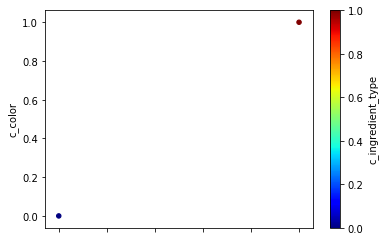

In [7]:
corn_and_olives_dataset.plot(
    kind='scatter', 
    x='c_shape', 
    y='c_color', 
    c='c_ingredient_type', 
    colormap='jet'
)

These two points can be separated by a single line.

### Set up and Train your first Neuron

In [8]:
from tensorflow.keras.layers import Dense

In [9]:
single_neuron_layer = Dense(
    units=1,
    input_dim=2, 
    activation='sigmoid'
)

In [10]:
loss='binary_crossentropy'

In [11]:
from tensorflow.keras.optimizers import SGD

In [12]:
sgd = SGD()

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
single_neuron_model = Sequential()

Finally, let's bring the components into the model and check out the setup using the .summary() function:

In [15]:
single_neuron_model.add(single_neuron_layer)
single_neuron_model.compile(loss=loss, optimizer=sgd, metrics=['accuracy'])
single_neuron_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


You can see in the summary that we have a single Neuron which outputs a single value, with 3 parameters to train (colour_weight, shape_weight, bias).

Use the 'fit' function to train it:

In [16]:
history = single_neuron_model.fit(
    corn_and_olives_dataset[['c_shape', 'c_color']], 
    corn_and_olives_dataset[['c_ingredient_type']], 
    epochs=2500
)

Epoch 1/2500
1/1 [==============================] - 0s 984us/step - loss: 1.0402 - accuracy: 0.5000
Epoch 2/2500
1/1 [==============================] - 0s 1ms/step - loss: 1.0372 - accuracy: 0.0000e+00
Epoch 3/2500
1/1 [==============================] - 0s 1ms/step - loss: 1.0342 - accuracy: 0.0000e+00
Epoch 4/2500
1/1 [==============================] - 0s 1ms/step - loss: 1.0313 - accuracy: 0.0000e+00
Epoch 5/2500
1/1 [==============================] - 0s 1ms/step - loss: 1.0284 - accuracy: 0.0000e+00
Epoch 6/2500
1/1 [==============================] - 0s 738us/step - loss: 1.0255 - accuracy: 0.0000e+00
Epoch 7/2500
1/1 [==============================] - 0s 727us/step - loss: 1.0226 - accuracy: 0.0000e+00
Epoch 8/2500
1/1 [==============================] - 0s 714us/step - loss: 1.0197 - accuracy: 0.0000e+00
Epoch 9/2500
1/1 [==============================] - 0s 826us/step - loss: 1.0168 - accuracy: 0.0000e+00
Epoch 10/2500
1/1 [==============================] - 0s 815us/step - loss: 1

1/1 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.0000e+00
Epoch 80/2500
1/1 [==============================] - 0s 947us/step - loss: 0.8478 - accuracy: 0.0000e+00
Epoch 81/2500
1/1 [==============================] - 0s 921us/step - loss: 0.8459 - accuracy: 0.0000e+00
Epoch 82/2500
1/1 [==============================] - 0s 858us/step - loss: 0.8439 - accuracy: 0.0000e+00
Epoch 83/2500
1/1 [==============================] - 0s 823us/step - loss: 0.8420 - accuracy: 0.0000e+00
Epoch 84/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.0000e+00
Epoch 85/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.0000e+00
Epoch 86/2500
1/1 [==============================] - 0s 927us/step - loss: 0.8363 - accuracy: 0.0000e+00
Epoch 87/2500
1/1 [==============================] - 0s 974us/step - loss: 0.8344 - accuracy: 0.0000e+00
Epoch 88/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.

1/1 [==============================] - 0s 1ms/step - loss: 0.7248 - accuracy: 0.0000e+00
Epoch 158/2500
1/1 [==============================] - 0s 944us/step - loss: 0.7235 - accuracy: 0.0000e+00
Epoch 159/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.0000e+00
Epoch 160/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.0000e+00
Epoch 161/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.0000e+00
Epoch 162/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.0000e+00
Epoch 163/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.0000e+00
Epoch 164/2500
1/1 [==============================] - 0s 939us/step - loss: 0.7159 - accuracy: 0.0000e+00
Epoch 165/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.7146 - accuracy: 0.5000
Epoch 166/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.713

1/1 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.5000
Epoch 239/2500
1/1 [==============================] - 0s 986us/step - loss: 0.6358 - accuracy: 0.5000
Epoch 240/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.5000
Epoch 241/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6340 - accuracy: 0.5000
Epoch 242/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.5000
Epoch 243/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.5000
Epoch 244/2500
1/1 [==============================] - 0s 923us/step - loss: 0.6313 - accuracy: 0.5000
Epoch 245/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6304 - accuracy: 0.5000
Epoch 246/2500
1/1 [==============================] - 0s 920us/step - loss: 0.6295 - accuracy: 0.5000
Epoch 247/2500
1/1 [==============================] - 0s 946us/step - loss: 0.6287 - accuracy: 0.5000
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.5000
Epoch 320/2500
1/1 [==============================] - 0s 858us/step - loss: 0.5717 - accuracy: 0.5000
Epoch 321/2500
1/1 [==============================] - 0s 995us/step - loss: 0.5710 - accuracy: 0.5000
Epoch 322/2500
1/1 [==============================] - 0s 919us/step - loss: 0.5703 - accuracy: 0.5000
Epoch 323/2500
1/1 [==============================] - 0s 925us/step - loss: 0.5696 - accuracy: 0.5000
Epoch 324/2500
1/1 [==============================] - 0s 808us/step - loss: 0.5689 - accuracy: 0.5000
Epoch 325/2500
1/1 [==============================] - 0s 815us/step - loss: 0.5682 - accuracy: 0.5000
Epoch 326/2500
1/1 [==============================] - 0s 839us/step - loss: 0.5675 - accuracy: 0.5000
Epoch 327/2500
1/1 [==============================] - 0s 868us/step - loss: 0.5668 - accuracy: 0.5000
Epoch 328/2500
1/1 [==============================] - 0s 829us/step - loss: 0.5662 - accuracy: 0.50

1/1 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 1.0000
Epoch 400/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 1.0000
Epoch 401/2500
1/1 [==============================] - 0s 935us/step - loss: 0.5211 - accuracy: 1.0000
Epoch 402/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 1.0000
Epoch 403/2500
1/1 [==============================] - 0s 961us/step - loss: 0.5199 - accuracy: 1.0000
Epoch 404/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 1.0000
Epoch 405/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 1.0000
Epoch 406/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 1.0000
Epoch 407/2500
1/1 [==============================] - 0s 932us/step - loss: 0.5177 - accuracy: 1.0000
Epoch 408/2500
1/1 [==============================] - 0s 976us/step - loss: 0.5171 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 825us/step - loss: 0.4805 - accuracy: 1.0000
Epoch 480/2500
1/1 [==============================] - 0s 850us/step - loss: 0.4800 - accuracy: 1.0000
Epoch 481/2500
1/1 [==============================] - 0s 838us/step - loss: 0.4795 - accuracy: 1.0000
Epoch 482/2500
1/1 [==============================] - 0s 852us/step - loss: 0.4791 - accuracy: 1.0000
Epoch 483/2500
1/1 [==============================] - 0s 829us/step - loss: 0.4786 - accuracy: 1.0000
Epoch 484/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 1.0000
Epoch 485/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 1.0000
Epoch 486/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 1.0000
Epoch 487/2500
1/1 [==============================] - 0s 843us/step - loss: 0.4767 - accuracy: 1.0000
Epoch 488/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 930us/step - loss: 0.4447 - accuracy: 1.0000
Epoch 560/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 1.0000
Epoch 561/2500
1/1 [==============================] - 0s 990us/step - loss: 0.4439 - accuracy: 1.0000
Epoch 562/2500
1/1 [==============================] - 0s 979us/step - loss: 0.4435 - accuracy: 1.0000
Epoch 563/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 1.0000
Epoch 564/2500
1/1 [==============================] - 0s 950us/step - loss: 0.4426 - accuracy: 1.0000
Epoch 565/2500
1/1 [==============================] - 0s 994us/step - loss: 0.4422 - accuracy: 1.0000
Epoch 566/2500
1/1 [==============================] - 0s 888us/step - loss: 0.4418 - accuracy: 1.0000
Epoch 567/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 1.0000
Epoch 568/2500
1/1 [==============================] - 0s 933us/step - loss: 0.4410 - accuracy: 1.0000
E

1/1 [==============================] - 0s 915us/step - loss: 0.4134 - accuracy: 1.0000
Epoch 640/2500
1/1 [==============================] - 0s 961us/step - loss: 0.4130 - accuracy: 1.0000
Epoch 641/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 1.0000
Epoch 642/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 1.0000
Epoch 643/2500
1/1 [==============================] - 0s 953us/step - loss: 0.4119 - accuracy: 1.0000
Epoch 644/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 1.0000
Epoch 645/2500
1/1 [==============================] - 0s 938us/step - loss: 0.4112 - accuracy: 1.0000
Epoch 646/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 1.0000
Epoch 647/2500
1/1 [==============================] - 0s 964us/step - loss: 0.4105 - accuracy: 1.0000
Epoch 648/2500
1/1 [==============================] - 0s 973us/step - loss: 0.4101 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 1.0000
Epoch 721/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 1.0000
Epoch 722/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 1.0000
Epoch 723/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 1.0000
Epoch 724/2500
1/1 [==============================] - 0s 936us/step - loss: 0.3840 - accuracy: 1.0000
Epoch 725/2500
1/1 [==============================] - 0s 979us/step - loss: 0.3837 - accuracy: 1.0000
Epoch 726/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 1.0000
Epoch 727/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 1.0000
Epoch 728/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 1.0000
Epoch 729/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 1.0000
Epoch 730/2

1/1 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 1.0000
Epoch 802/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 1.0000
Epoch 803/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 1.0000
Epoch 804/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 1.0000
Epoch 805/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 1.0000
Epoch 806/2500
1/1 [==============================] - 0s 904us/step - loss: 0.3589 - accuracy: 1.0000
Epoch 807/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 1.0000
Epoch 808/2500
1/1 [==============================] - 0s 974us/step - loss: 0.3583 - accuracy: 1.0000
Epoch 809/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 1.0000
Epoch 810/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 1.0000
Epoch 811/2

1/1 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 1.0000
Epoch 882/2500
1/1 [==============================] - 0s 949us/step - loss: 0.3379 - accuracy: 1.0000
Epoch 883/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 1.0000
Epoch 884/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 1.0000
Epoch 885/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 1.0000
Epoch 886/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 1.0000
Epoch 887/2500
1/1 [==============================] - 0s 941us/step - loss: 0.3366 - accuracy: 1.0000
Epoch 888/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 1.0000
Epoch 889/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 1.0000
Epoch 890/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 1.0000
Epoch 891/2

1/1 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 1.0000
Epoch 963/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 1.0000
Epoch 964/2500
1/1 [==============================] - 0s 992us/step - loss: 0.3174 - accuracy: 1.0000
Epoch 965/2500
1/1 [==============================] - 0s 976us/step - loss: 0.3172 - accuracy: 1.0000
Epoch 966/2500
1/1 [==============================] - 0s 934us/step - loss: 0.3169 - accuracy: 1.0000
Epoch 967/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 1.0000
Epoch 968/2500
1/1 [==============================] - 0s 927us/step - loss: 0.3165 - accuracy: 1.0000
Epoch 969/2500
1/1 [==============================] - 0s 876us/step - loss: 0.3162 - accuracy: 1.0000
Epoch 970/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 1.0000
Epoch 971/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 874us/step - loss: 0.3000 - accuracy: 1.0000
Epoch 1042/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 1.0000
Epoch 1043/2500
1/1 [==============================] - 0s 971us/step - loss: 0.2996 - accuracy: 1.0000
Epoch 1044/2500
1/1 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 1.00 - 0s 850us/step - loss: 0.2994 - accuracy: 1.0000
Epoch 1045/2500
1/1 [==============================] - 0s 824us/step - loss: 0.2992 - accuracy: 1.0000
Epoch 1046/2500
1/1 [==============================] - 0s 862us/step - loss: 0.2990 - accuracy: 1.0000
Epoch 1047/2500
1/1 [==============================] - 0s 908us/step - loss: 0.2987 - accuracy: 1.0000
Epoch 1048/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 1.0000
Epoch 1049/2500
1/1 [==============================] - 0s 925us/step - loss: 0.2983 - accuracy: 1.0000
Epoch 1050/2500
1/1 [==============================

1/1 [==============================] - 0s 983us/step - loss: 0.2840 - accuracy: 1.0000
Epoch 1120/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2838 - accuracy: 1.0000
Epoch 1121/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 1.0000
Epoch 1122/2500
1/1 [==============================] - 0s 954us/step - loss: 0.2834 - accuracy: 1.0000
Epoch 1123/2500
1/1 [==============================] - 0s 903us/step - loss: 0.2832 - accuracy: 1.0000
Epoch 1124/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2830 - accuracy: 1.0000
Epoch 1125/2500
1/1 [==============================] - 0s 857us/step - loss: 0.2828 - accuracy: 1.0000
Epoch 1126/2500
1/1 [==============================] - 0s 917us/step - loss: 0.2826 - accuracy: 1.0000
Epoch 1127/2500
1/1 [==============================] - 0s 909us/step - loss: 0.2824 - accuracy: 1.0000
Epoch 1128/2500
1/1 [==============================] - 0s 951us/step - loss: 0.2822 - accuracy:

1/1 [==============================] - 0s 986us/step - loss: 0.2690 - accuracy: 1.0000
Epoch 1200/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 1.0000
Epoch 1201/2500
1/1 [==============================] - 0s 998us/step - loss: 0.2686 - accuracy: 1.0000
Epoch 1202/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 1.0000
Epoch 1203/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 1.0000
Epoch 1204/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 1.0000
Epoch 1205/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2679 - accuracy: 1.0000
Epoch 1206/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 1.0000
Epoch 1207/2500
1/1 [==============================] - ETA: 0s - loss: 0.2676 - accuracy: 1.00 - 0s 1ms/step - loss: 0.2676 - accuracy: 1.0000
Epoch 1208/2500
1/1 [==============================] - 0s 980

1/1 [==============================] - 0s 942us/step - loss: 0.2555 - accuracy: 1.0000
Epoch 1279/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 1.0000
Epoch 1280/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 1.0000
Epoch 1281/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2550 - accuracy: 1.0000
Epoch 1282/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 1.0000
Epoch 1283/2500
1/1 [==============================] - 0s 959us/step - loss: 0.2546 - accuracy: 1.0000
Epoch 1284/2500
1/1 [==============================] - 0s 830us/step - loss: 0.2545 - accuracy: 1.0000
Epoch 1285/2500
1/1 [==============================] - 0s 870us/step - loss: 0.2543 - accuracy: 1.0000
Epoch 1286/2500
1/1 [==============================] - 0s 875us/step - loss: 0.2541 - accuracy: 1.0000
Epoch 1287/2500
1/1 [==============================] - 0s 859us/step - loss: 0.2540 - accuracy: 1

1/1 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 1.0000
Epoch 1358/2500
1/1 [==============================] - 0s 974us/step - loss: 0.2429 - accuracy: 1.0000
Epoch 1359/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2427 - accuracy: 1.0000
Epoch 1360/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 1.0000
Epoch 1361/2500
1/1 [==============================] - 0s 886us/step - loss: 0.2424 - accuracy: 1.0000
Epoch 1362/2500
1/1 [==============================] - 0s 941us/step - loss: 0.2423 - accuracy: 1.0000
Epoch 1363/2500
1/1 [==============================] - 0s 908us/step - loss: 0.2421 - accuracy: 1.0000
Epoch 1364/2500
1/1 [==============================] - 0s 973us/step - loss: 0.2420 - accuracy: 1.0000
Epoch 1365/2500
1/1 [==============================] - 0s 911us/step - loss: 0.2419 - accuracy: 1.0000
Epoch 1366/2500
1/1 [==============================] - 0s 852us/step - loss: 0.2417 - accuracy:

1/1 [==============================] - 0s 836us/step - loss: 0.2315 - accuracy: 1.0000
Epoch 1438/2500
1/1 [==============================] - 0s 900us/step - loss: 0.2314 - accuracy: 1.0000
Epoch 1439/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 1.0000
Epoch 1440/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 1.0000
Epoch 1441/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 1.0000
Epoch 1442/2500
1/1 [==============================] - 0s 890us/step - loss: 0.2308 - accuracy: 1.0000
Epoch 1443/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 1.0000
Epoch 1444/2500
1/1 [==============================] - 0s 985us/step - loss: 0.2305 - accuracy: 1.0000
Epoch 1445/2500
1/1 [==============================] - 0s 866us/step - loss: 0.2304 - accuracy: 1.0000
Epoch 1446/2500
1/1 [==============================] - 0s 830us/step - loss: 0.2303 - accuracy: 1

1/1 [==============================] - 0s 990us/step - loss: 0.2209 - accuracy: 1.0000
Epoch 1518/2500
1/1 [==============================] - 0s 860us/step - loss: 0.2208 - accuracy: 1.0000
Epoch 1519/2500
1/1 [==============================] - 0s 808us/step - loss: 0.2206 - accuracy: 1.0000
Epoch 1520/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 1.0000
Epoch 1521/2500
1/1 [==============================] - 0s 946us/step - loss: 0.2204 - accuracy: 1.0000
Epoch 1522/2500
1/1 [==============================] - 0s 962us/step - loss: 0.2203 - accuracy: 1.0000
Epoch 1523/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 1.0000
Epoch 1524/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 1.0000
Epoch 1525/2500
1/1 [==============================] - 0s 845us/step - loss: 0.2199 - accuracy: 1.0000
Epoch 1526/2500
1/1 [==============================] - 0s 860us/step - loss: 0.2198 - accuracy:

1/1 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 1.0000
Epoch 1598/2500
1/1 [==============================] - 0s 909us/step - loss: 0.2110 - accuracy: 1.0000
Epoch 1599/2500
1/1 [==============================] - 0s 815us/step - loss: 0.2109 - accuracy: 1.0000
Epoch 1600/2500
1/1 [==============================] - 0s 918us/step - loss: 0.2108 - accuracy: 1.0000
Epoch 1601/2500
1/1 [==============================] - 0s 913us/step - loss: 0.2106 - accuracy: 1.0000
Epoch 1602/2500
1/1 [==============================] - 0s 829us/step - loss: 0.2105 - accuracy: 1.0000
Epoch 1603/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 1.0000
Epoch 1604/2500
1/1 [==============================] - 0s 881us/step - loss: 0.2103 - accuracy: 1.0000
Epoch 1605/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2102 - accuracy: 1.0000
Epoch 1606/2500
1/1 [==============================] - 0s 988us/step - loss: 0.2101 - accuracy:

1/1 [==============================] - 0s 942us/step - loss: 0.2021 - accuracy: 1.0000
Epoch 1678/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2020 - accuracy: 1.0000
Epoch 1679/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 1.0000
Epoch 1680/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 1.0000
Epoch 1681/2500
1/1 [==============================] - 0s 943us/step - loss: 0.2016 - accuracy: 1.0000
Epoch 1682/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 1.0000
Epoch 1683/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 1.0000
Epoch 1684/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 1.0000
Epoch 1685/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 1.0000
Epoch 1686/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 894us/step - loss: 0.1937 - accuracy: 1.0000
Epoch 1758/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 1.0000
Epoch 1759/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 1.0000
Epoch 1760/2500
1/1 [==============================] - 0s 958us/step - loss: 0.1934 - accuracy: 1.0000
Epoch 1761/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1933 - accuracy: 1.0000
Epoch 1762/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1932 - accuracy: 1.0000
Epoch 1763/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 1.0000
Epoch 1764/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 1.0000
Epoch 1765/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 1.0000
Epoch 1766/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 1.0000
Epoch 1838/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 1.0000
Epoch 1839/2500
1/1 [==============================] - 0s 968us/step - loss: 0.1857 - accuracy: 1.0000
Epoch 1840/2500
1/1 [==============================] - 0s 918us/step - loss: 0.1856 - accuracy: 1.0000
Epoch 1841/2500
1/1 [==============================] - ETA: 0s - loss: 0.1855 - accuracy: 1.00 - 0s 993us/step - loss: 0.1855 - accuracy: 1.0000
Epoch 1842/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 1.0000
Epoch 1843/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 1.0000
Epoch 1844/2500
1/1 [==============================] - 0s 954us/step - loss: 0.1852 - accuracy: 1.0000
Epoch 1845/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 1.0000
Epoch 1846/2500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 1.0000
Epoch 1918/2500
1/1 [==============================] - 0s 863us/step - loss: 0.1786 - accuracy: 1.0000
Epoch 1919/2500
1/1 [==============================] - 0s 965us/step - loss: 0.1785 - accuracy: 1.0000
Epoch 1920/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 1.0000
Epoch 1921/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 1.0000
Epoch 1922/2500
1/1 [==============================] - 0s 989us/step - loss: 0.1782 - accuracy: 1.0000
Epoch 1923/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 1.0000
Epoch 1924/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1781 - accuracy: 1.0000
Epoch 1925/2500
1/1 [==============================] - 0s 968us/step - loss: 0.1780 - accuracy: 1.0000
Epoch 1926/2500
1/1 [==============================] - 0s 917us/step - loss: 0.1779 - accuracy: 1.0

1/1 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 1.0000
Epoch 1998/2500
1/1 [==============================] - 0s 963us/step - loss: 0.1718 - accuracy: 1.0000
Epoch 1999/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 1.0000
Epoch 2000/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 1.0000
Epoch 2001/2500
1/1 [==============================] - 0s 978us/step - loss: 0.1716 - accuracy: 1.0000
Epoch 2002/2500
1/1 [==============================] - 0s 900us/step - loss: 0.1715 - accuracy: 1.0000
Epoch 2003/2500
1/1 [==============================] - 0s 869us/step - loss: 0.1714 - accuracy: 1.0000
Epoch 2004/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 1.0000
Epoch 2005/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 1.0000
Epoch 2006/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 1.000

1/1 [==============================] - 0s 928us/step - loss: 0.1656 - accuracy: 1.0000
Epoch 2078/2500
1/1 [==============================] - 0s 946us/step - loss: 0.1655 - accuracy: 1.0000
Epoch 2079/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 1.0000
Epoch 2080/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 1.0000
Epoch 2081/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 1.0000
Epoch 2082/2500
1/1 [==============================] - 0s 827us/step - loss: 0.1652 - accuracy: 1.0000
Epoch 2083/2500
1/1 [==============================] - 0s 814us/step - loss: 0.1652 - accuracy: 1.0000
Epoch 2084/2500
1/1 [==============================] - 0s 817us/step - loss: 0.1651 - accuracy: 1.0000
Epoch 2085/2500
1/1 [==============================] - 0s 868us/step - loss: 0.1650 - accuracy: 1.0000
Epoch 2086/2500
1/1 [==============================] - 0s 822us/step - loss: 0.1649 - accuracy:

1/1 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 1.0000
Epoch 2157/2500
1/1 [==============================] - 0s 839us/step - loss: 0.1597 - accuracy: 1.0000
Epoch 2158/2500
1/1 [==============================] - 0s 918us/step - loss: 0.1597 - accuracy: 1.0000
Epoch 2159/2500
1/1 [==============================] - 0s 875us/step - loss: 0.1596 - accuracy: 1.0000
Epoch 2160/2500
1/1 [==============================] - 0s 855us/step - loss: 0.1595 - accuracy: 1.0000
Epoch 2161/2500
1/1 [==============================] - 0s 873us/step - loss: 0.1594 - accuracy: 1.0000
Epoch 2162/2500
1/1 [==============================] - 0s 973us/step - loss: 0.1594 - accuracy: 1.0000
Epoch 2163/2500
1/1 [==============================] - 0s 946us/step - loss: 0.1593 - accuracy: 1.0000
Epoch 2164/2500
1/1 [==============================] - 0s 893us/step - loss: 0.1592 - accuracy: 1.0000
Epoch 2165/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1592 - accurac

1/1 [==============================] - 0s 848us/step - loss: 0.1543 - accuracy: 1.0000
Epoch 2237/2500
1/1 [==============================] - 0s 944us/step - loss: 0.1542 - accuracy: 1.0000
Epoch 2238/2500
1/1 [==============================] - 0s 937us/step - loss: 0.1541 - accuracy: 1.0000
Epoch 2239/2500
1/1 [==============================] - 0s 947us/step - loss: 0.1541 - accuracy: 1.0000
Epoch 2240/2500
1/1 [==============================] - 0s 886us/step - loss: 0.1540 - accuracy: 1.0000
Epoch 2241/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 1.0000
Epoch 2242/2500
1/1 [==============================] - 0s 994us/step - loss: 0.1539 - accuracy: 1.0000
Epoch 2243/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 1.0000
Epoch 2244/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 1.0000
Epoch 2245/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 1

1/1 [==============================] - 0s 861us/step - loss: 0.1491 - accuracy: 1.0000
Epoch 2317/2500
1/1 [==============================] - 0s 857us/step - loss: 0.1490 - accuracy: 1.0000
Epoch 2318/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 1.0000
Epoch 2319/2500
1/1 [==============================] - 0s 875us/step - loss: 0.1489 - accuracy: 1.0000
Epoch 2320/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 1.0000
Epoch 2321/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 1.0000
Epoch 2322/2500
1/1 [==============================] - 0s 902us/step - loss: 0.1487 - accuracy: 1.0000
Epoch 2323/2500
1/1 [==============================] - 0s 890us/step - loss: 0.1487 - accuracy: 1.0000
Epoch 2324/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 1.0000
Epoch 2325/2500
1/1 [==============================] - 0s 868us/step - loss: 0.1485 - accuracy: 1

1/1 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 1.0000
Epoch 2396/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 1.0000
Epoch 2397/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 1.0000
Epoch 2398/2500
1/1 [==============================] - 0s 888us/step - loss: 0.1441 - accuracy: 1.0000
Epoch 2399/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 1.0000
Epoch 2400/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 1.0000
Epoch 2401/2500
1/1 [==============================] - 0s 915us/step - loss: 0.1439 - accuracy: 1.0000
Epoch 2402/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 1.0000
Epoch 2403/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 1.0000
Epoch 2404/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 1.0000
Epoch 2476/2500
1/1 [==============================] - 0s 949us/step - loss: 0.1396 - accuracy: 1.0000
Epoch 2477/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 1.0000
Epoch 2478/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 1.0000
Epoch 2479/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 1.0000
Epoch 2480/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 1.0000
Epoch 2481/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 1.0000
Epoch 2482/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 1.0000
Epoch 2483/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 1.0000
Epoch 2484/2500
1/1 [==============================] - 0s 982us/step - loss: 0.1392 - accuracy: 1.0000
Ep

Training is now complete. What predictions is the model making on the dataset?

In [17]:
test_loss, test_acc = single_neuron_model.evaluate(
    corn_and_olives_dataset[['c_shape', 'c_color']], 
    corn_and_olives_dataset['c_ingredient_type']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.13825225830078125, accuracy = 1.0


Congratulations, you have just trained your first Neuron!